# EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
# plt.style.use('ggplot')

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
data=pd.read_csv('/content/nyc_taxi_trip_duration.csv')

In [8]:
data.shape

(729322, 11)

data has 729322 rows and 11 columns

In [9]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [11]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

id - a unique identifier for each trip<br>
vendor_id - a code indicating the provider associated with the trip record<br>
pickup_datetime - date and time when the meter was engaged<br>
dropoff_datetime - date and time when the meter was disengaged<br>
passenger_count - the number of passengers in the vehicle (driver entered value)<br>
pickup_longitude - the longitude where the meter was engaged<br>
pickup_latitude - the latitude where the meter was engaged<br>
dropoff_longitude - the longitude where the meter was disengaged<br>
dropoff_latitude - the latitude where the meter was disengaged<br>
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)<br>
trip_duration - (target) duration of the trip in seconds<br>

In [12]:
data['vendor_id']=data['vendor_id'].astype('category')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

vendor_id & store_and_fwd_flag variables represents only 2 values with repetition so it would be converted to category

DATE & TIME

In [13]:
date = pd.DatetimeIndex(data['pickup_datetime'])
data['pickup_doy']=date.dayofyear
data['pickup_moy']=date.month
data['pickup_dow']=date.dayofweek
data['pickup_hod']=date.hour

In [14]:
date = pd.DatetimeIndex(data['dropoff_datetime'])
data['dropoff_doy']=date.dayofyear
data['dropoff_moy']=date.month
data['dropoff_dow']=date.dayofweek
data['dropoff_hod']=date.hour

Breaking down date and time into granular information helps us extract insights with more precision

In [15]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_doy,pickup_moy,pickup_dow,pickup_hod,dropoff_doy,dropoff_moy,dropoff_dow,dropoff_hod
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,16,60,2,0,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,23,71,3,4,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,17,52,2,6,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,9,5,1,1,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,6,48,2,2,6


In [16]:
data.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
pickup_doy               int64
pickup_moy               int64
pickup_dow               int64
pickup_hod               int64
dropoff_doy              int64
dropoff_moy              int64
dropoff_dow              int64
dropoff_hod              int64
dtype: object

## UNIVARIATE ANALYSIS

In [17]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_doy            0
pickup_moy            0
pickup_dow            0
pickup_hod            0
dropoff_doy           0
dropoff_moy           0
dropoff_dow           0
dropoff_hod           0
dtype: int64

There are no missing values in the data

In [18]:
#taking assumption and dropping irrelevant columns
data.drop('id',inplace=True,axis=1)

In [19]:
data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_doy,pickup_moy,pickup_dow,pickup_hod,dropoff_doy,dropoff_moy,dropoff_dow,dropoff_hod
0,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,60,2,0,16,60,2,0,16
1,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,71,3,4,23,71,3,4,23
2,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,52,2,6,17,52,2,6,18
3,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,5,1,1,9,5,1,1,10
4,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,48,2,2,6,48,2,2,6


In [20]:
pickup_time=['pickup_doy','pickup_moy','pickup_dow','pickup_hod']
dropoff_time=['dropoff_doy','dropoff_moy','dropoff_dow','dropoff_hod']
pickup_place=['pickup_longitude','pickup_latitude']
dropoff_place=['dropoff_longitude','dropoff_latitude']
passenger_count=['passenger_count']
trip_duration=['trip_duration']

In [21]:
data.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_doy,pickup_moy,pickup_dow,pickup_hod,dropoff_doy,dropoff_moy,dropoff_dow,dropoff_hod
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,91.882577,3.518410,3.049081,13.611698,91.893805,3.518764,3.053015,13.60616
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,51.555655,1.680661,1.954470,6.402853,51.556407,1.680815,1.956866,6.48637
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,48.000000,2.000000,1.000000,9.000000,48.000000,2.000000,1.000000,9.00000
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,92.000000,4.000000,3.000000,14.000000,92.000000,4.000000,3.000000,14.00000
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,136.000000,5.000000,5.000000,19.000000,136.000000,5.000000,5.000000,19.00000
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,182.000000,6.000000,6.000000,23.000000,183.000000,7.000000,6.000000,23.00000


In [22]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points,y=[0,0],color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi],y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean],y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median],y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

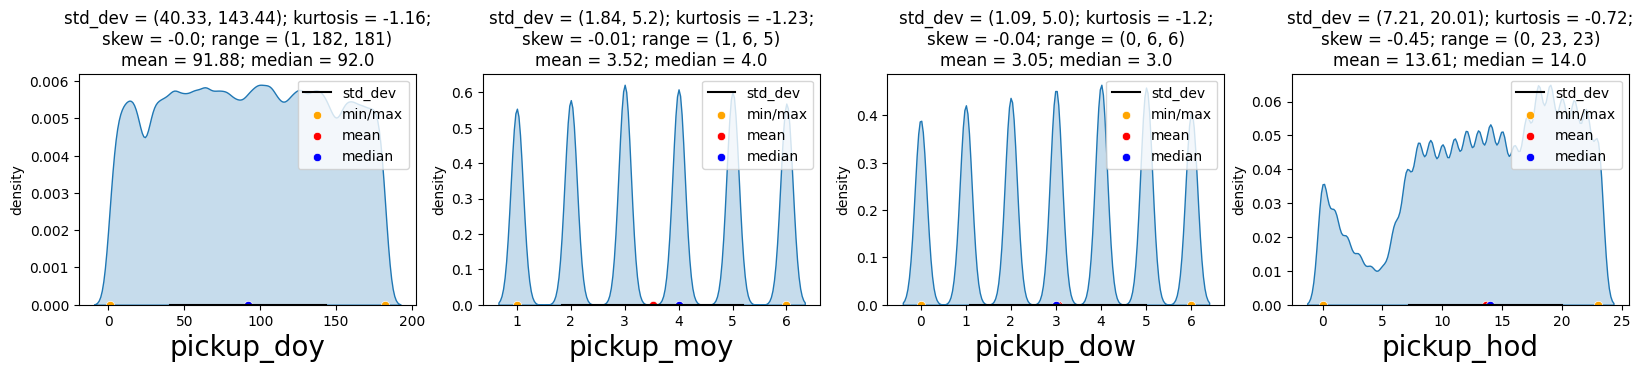

In [23]:
UVA_numeric(data,pickup_time)

**Summary**<br>


*   **Pickup Day of the year:**
       *   Range of the data is 181 with minimum val as 1 and maximum 182
       *   We can infer from the above plots that data is 1st 6 months of 2016
*   **Pickup Month of the year:**
       *   March, April, and May have slightly higher density than other months
*   **Pickup day of the week:**
       *   As the week proceeds, there is a uptrend till Saturday(being the most dense day in terms of number of trips) and then a slight dip on Sunday.
*   **Pickup hour of the day:**
       *   There is increase in number of trips at 12 AM then takes a dip for next 5 hours. There is an uptrend in number of trips having highest number of trips between 6 PM & 8 PM.







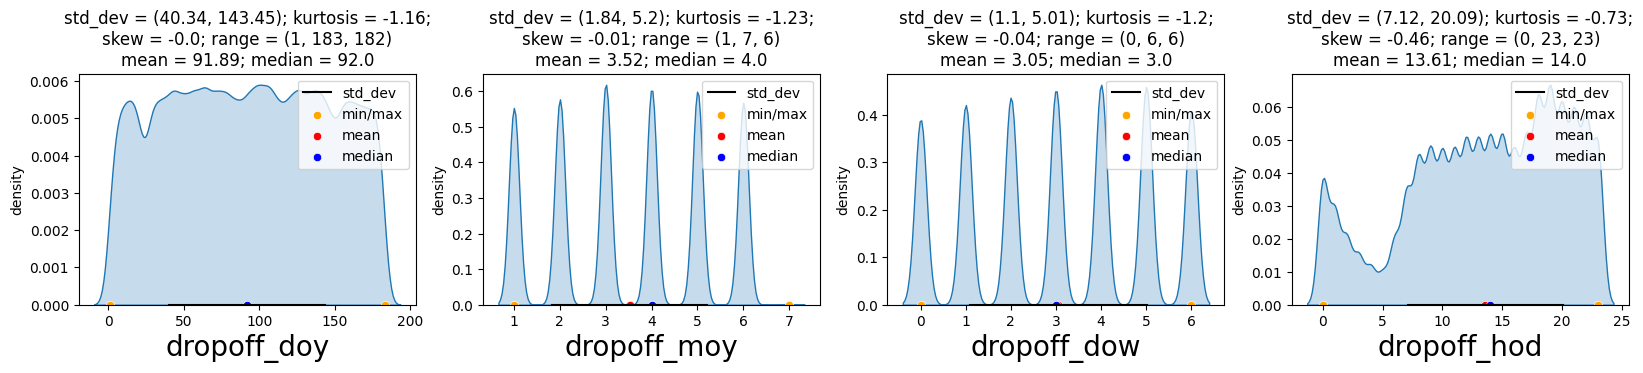

In [24]:
UVA_numeric(data,dropoff_time)

**Summary**<br>
*  Assuming majority of pickup and dropoff happened on the same date of the year. We can see the similar trend in pickup and drop off variables

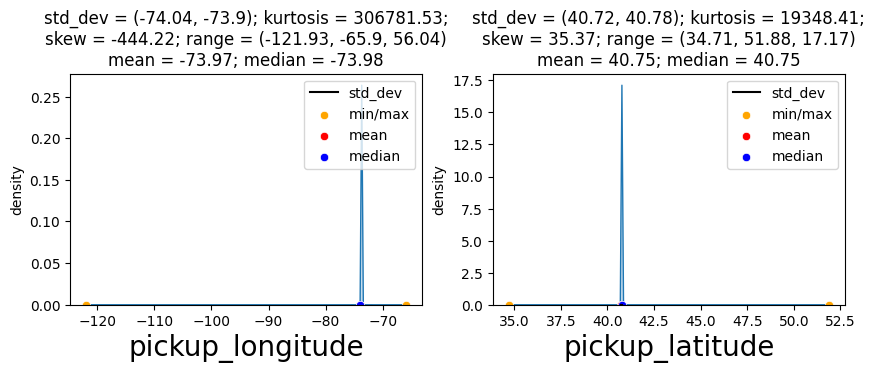

In [25]:
UVA_numeric(data,pickup_place)

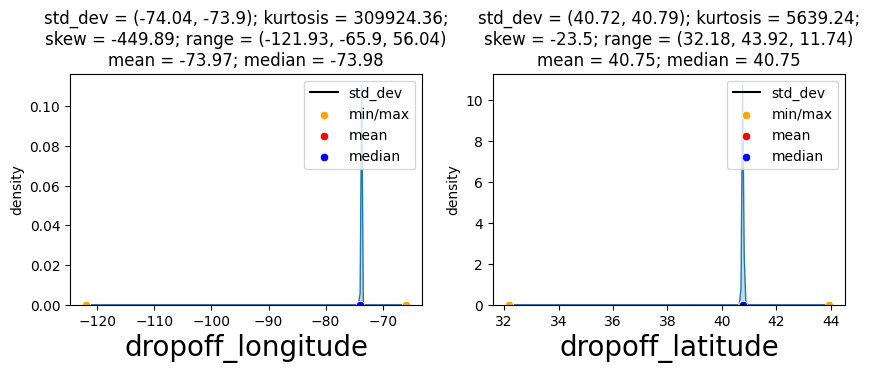

In [26]:
UVA_numeric(data,dropoff_place)

**Summary**<br>
*   We can observe that both pickup and dropoff longitude and latitude have outliers and will be treated later

<Axes: xlabel='trip_duration', ylabel='Density'>

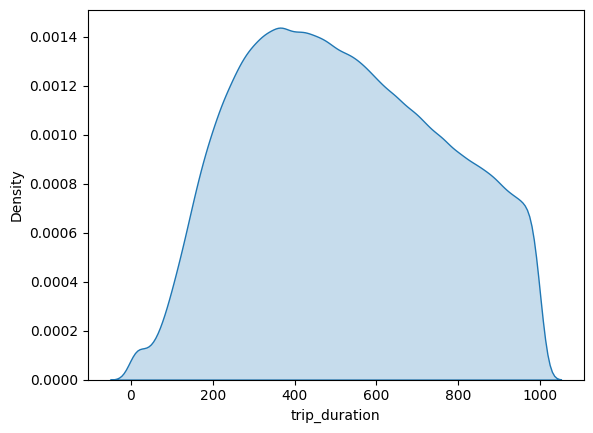

In [45]:
# data.trip_duration.value_counts().plot(kind='kde')

sns.kdeplot(data['trip_duration'][data['trip_duration']<1000],shade=True)

**Summary**<br>
We can observe that trips with duration of 400 seconds (around 7 minutes) have highest density for all the short trips less than 1000 seconds(around 17 minutes) in the dataset

<Axes: xlabel='trip_duration', ylabel='Density'>

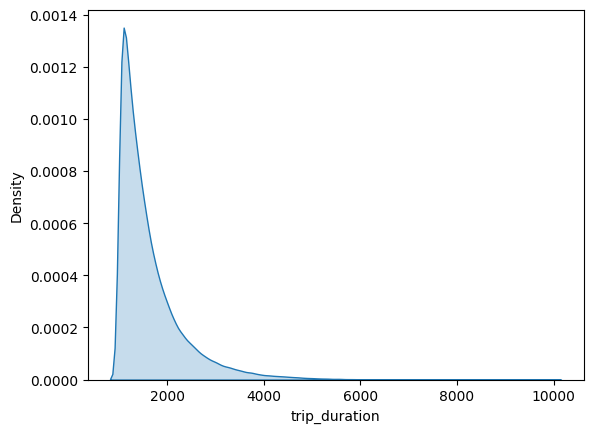

In [54]:
sns.kdeplot(data['trip_duration'][data['trip_duration'].between(1000,10000)],shade=True)

**Summary**<br>
we can observe that there is constant down trend in trip duration(in seconds) for longer trips(between 17 minutes and 3 hours)

**Summary**<br>
We can observe that most of the trip duration were between 0 and 400 minutes followed with a constant downtrend.<br>
A slight increase in the trip of around 750 minutes must be investigated further in order to find the particular place with this trip duration


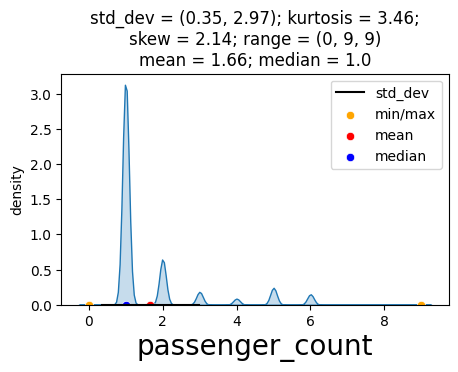

In [28]:
UVA_numeric(data,passenger_count)

**Summary**
*  We can observe that passenger count as 1 has highest density followed by down trend in number of trips per passenger count
*  Trips with passenger count as 5 have more density than trips' duration with 4 and 6.

<Axes: ylabel='vendor_id'>

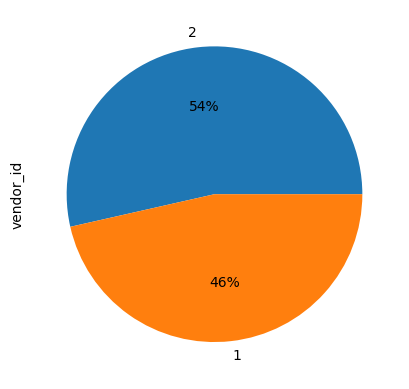

In [29]:
data.vendor_id.value_counts().plot(kind='pie',autopct='%1.0f%%')

**Summary**<br>
54 percent of data contains trip info for vendor 2<br>
46 percent of data contains trip info for vendor 1<br>

<Axes: ylabel='store_and_fwd_flag'>

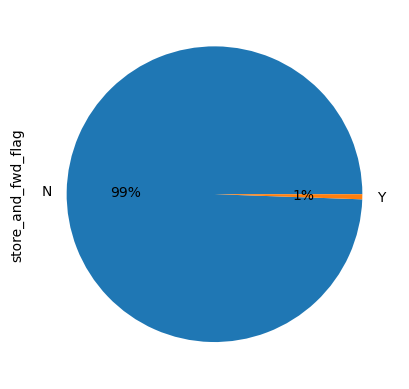

In [30]:
data.store_and_fwd_flag.value_counts().plot(kind='pie',autopct='%1.0f%%')

**Summary**<br>
*   99 percent of trips had connection while starting the trip
*    1 percent of trips did not had connection while starting the trip thus had to store the data

<Axes: xlabel='vendor_id'>

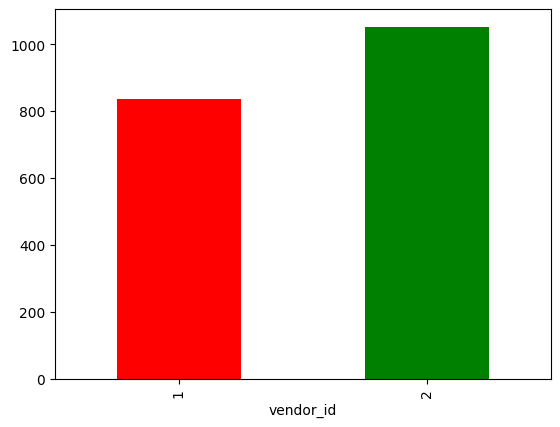

In [57]:
data.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color=['red','green'])

<Axes: xlabel='vendor_id'>

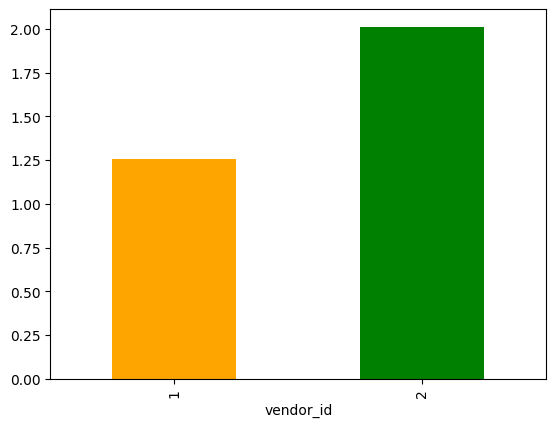

In [65]:
data.groupby('vendor_id')['passenger_count'].mean().plot(kind='bar',color=['orange','green'])

<Axes: xlabel='passenger_count', ylabel='Density'>

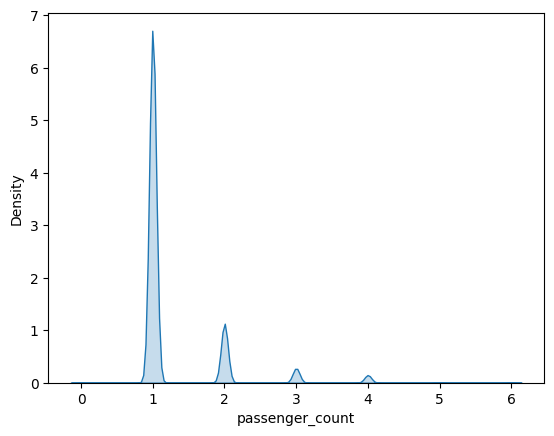

In [34]:
sns.kdeplot(data['passenger_count'][data['vendor_id']==1],shade=True)

<Axes: xlabel='passenger_count', ylabel='Density'>

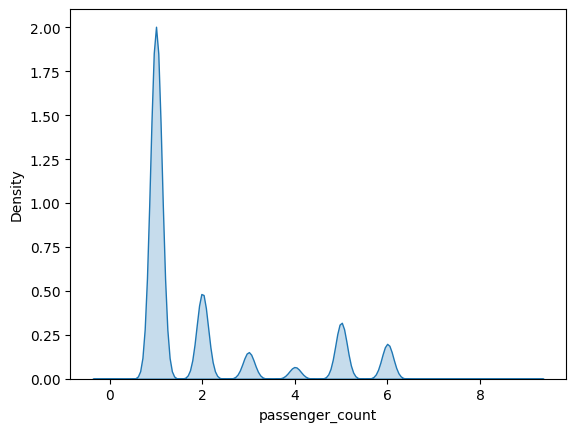

In [35]:
sns.kdeplot(data['passenger_count'][data['vendor_id']==2],shade=True)

<Axes: xlabel='pickup_hod', ylabel='Density'>

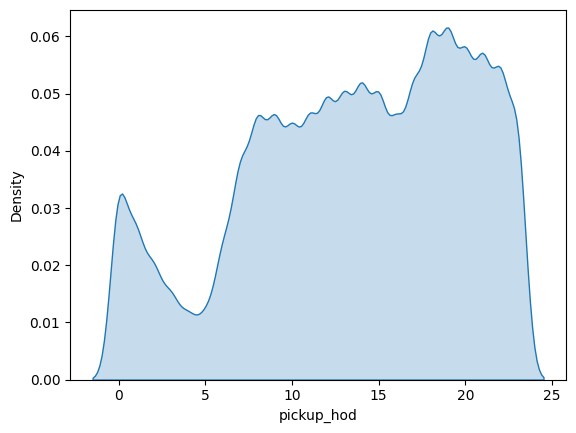

In [41]:
sns.kdeplot(data['pickup_hod'][data['vendor_id']==1],shade=True)

<Axes: xlabel='pickup_hod', ylabel='Density'>

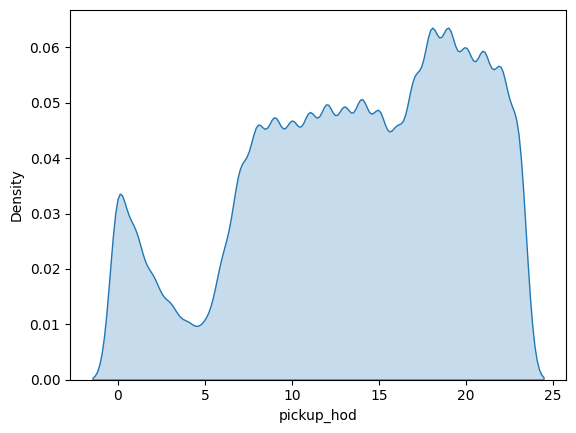

In [40]:
sns.kdeplot(data['pickup_hod'][data['vendor_id']==2],shade=True)

HANDLING OUTLIERS

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)

  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+0.1
      data2[i][data2[i]<whis_low] = whis_low-0.1

      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


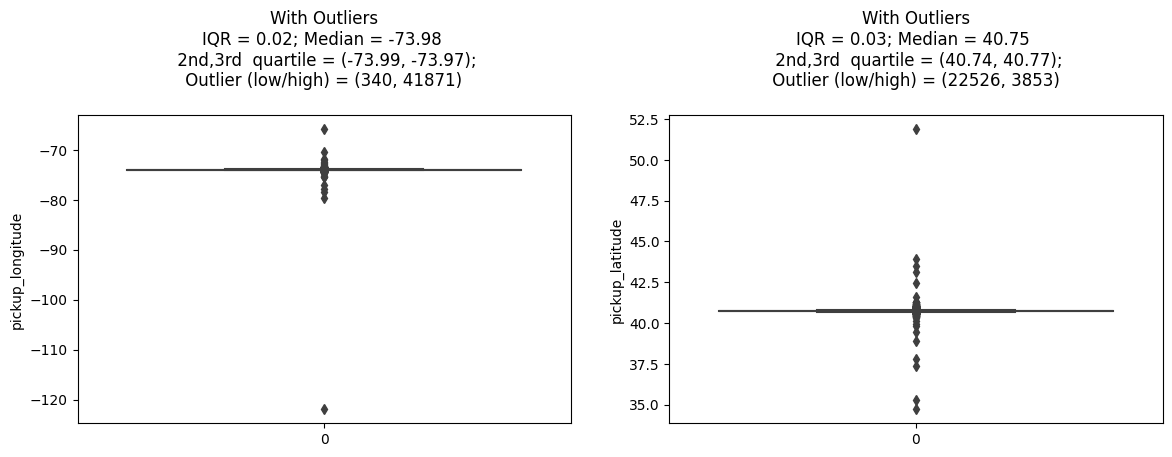

In [ ]:
UVA_outlier(data,pickup_place,)

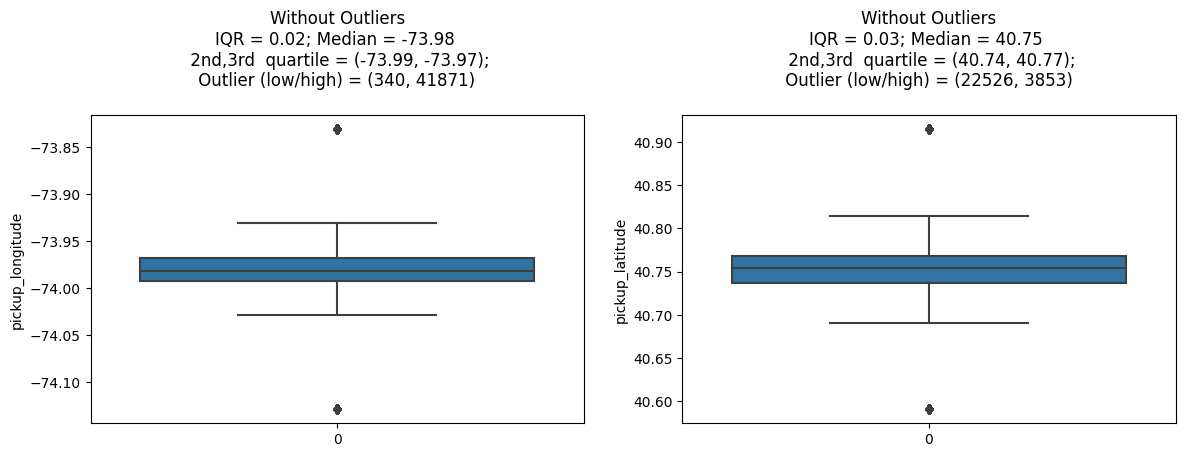

In [ ]:
UVA_outlier(data,pickup_place,False)

True
True


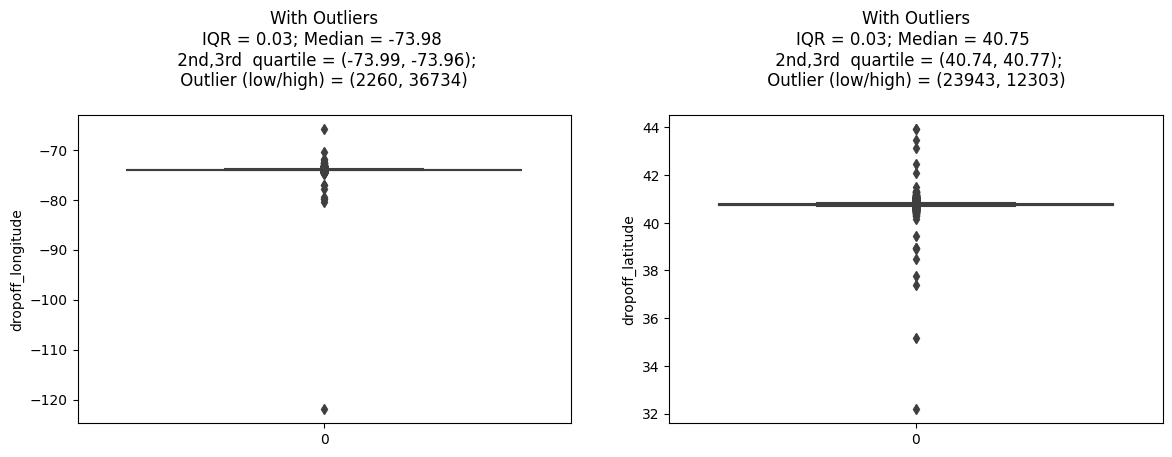

In [ ]:
UVA_outlier(data,dropoff_place,)

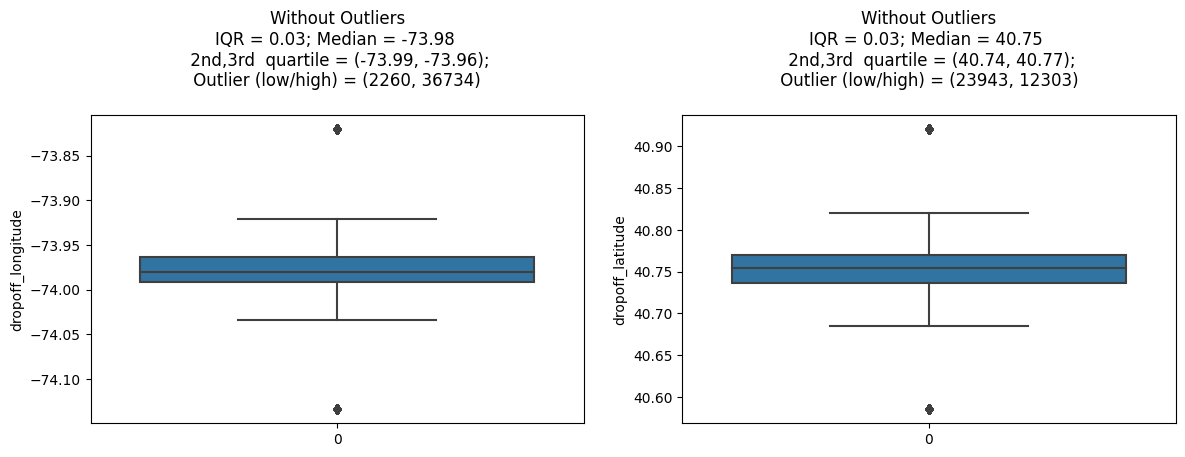

In [ ]:
UVA_outlier(data,dropoff_place,False)

## BIVARIATE ANALYSIS

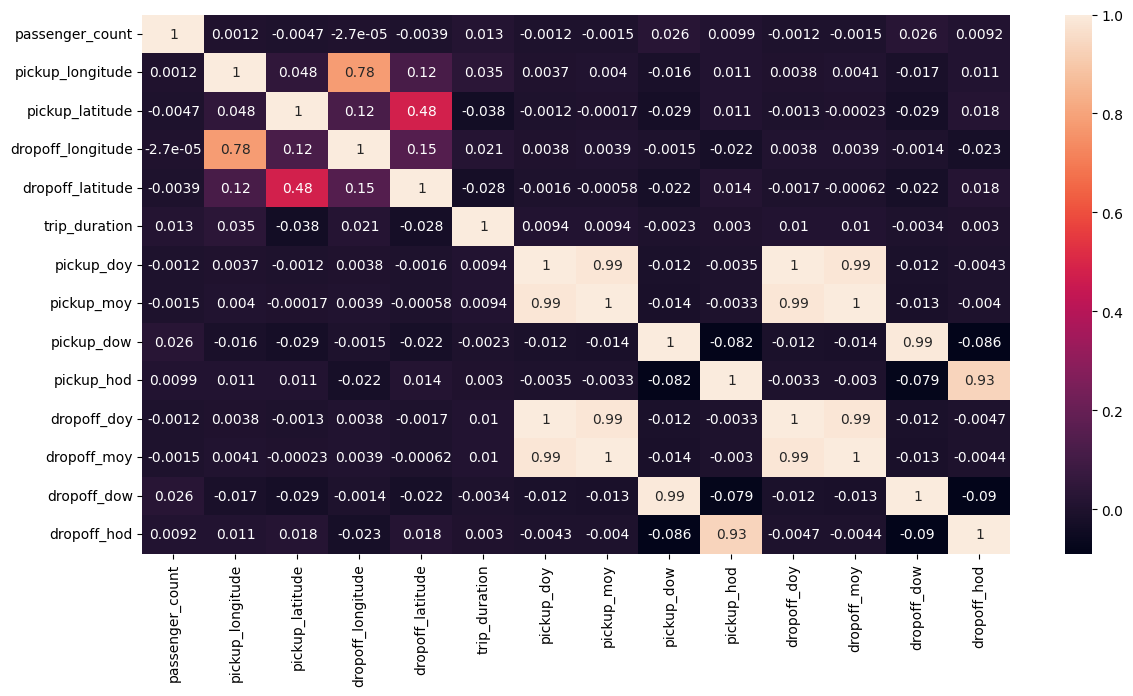

In [ ]:
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(),annot=True)
plt.show()

We can observe that variables that are correlated(moderately) are:<br>
pickup Latitude and dropoff latitude<br>
pickup longitude and dropoff longitude<br>

In [ ]:
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_doy             int64
pickup_moy             int64
pickup_dow             int64
pickup_hod             int64
dropoff_doy            int64
dropoff_moy            int64
dropoff_dow            int64
dropoff_hod            int64
dtype: object

<Axes: xlabel='pickup_latitude', ylabel='dropoff_latitude'>

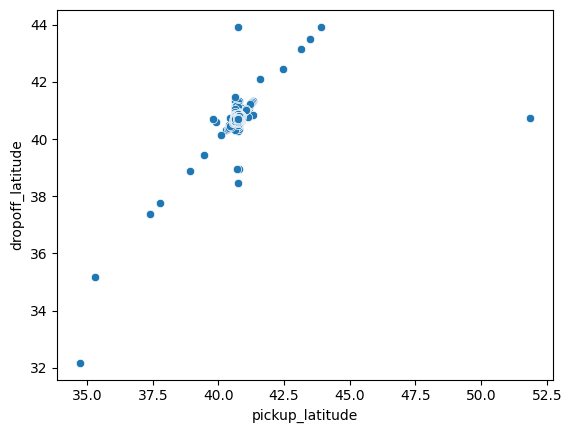

In [ ]:
sns.scatterplot(x='pickup_latitude',y='dropoff_latitude',data=data)

In [ ]:
var=['pickup_latitude','dropoff_latitude','pickup_longitude','dropoff_longitude']

In [ ]:
for col in var:
  quant25 = numerical[col].quantile(0.25)
  quant75 = numerical[col].quantile(0.75)
  IQR = quant75 - quant25
  med = numerical[col].median()
  whis_low = quant25-(1.5*IQR)
  whis_high = quant75+(1.5*IQR)

  numerical[col][numerical[col]>whis_high] = whis_high
  numerical[col][numerical[col]<whis_low] = whis_low


<ipython-input-40-a43f04ec62d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[col][numerical[col]<whis_low] = whis_low
<ipython-input-40-a43f04ec62d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[col][numerical[col]<whis_low] = whis_low
<ipython-input-40-a43f04ec62d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical[col][numerical[col]<whis_low] = whis_low
<ipython-input-40-a43f04ec62d0>:10: Sett

In [ ]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1

  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

In [ ]:
numerical


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_doy,pickup_moy,pickup_dow,pickup_hod,dropoff_doy,dropoff_moy,dropoff_dow,dropoff_hod
0,1,0.072030,3.732391,0.067534,3.732206,400,60,2,0,16,60,2,0,16
1,2,0.039504,3.731262,0.038249,3.730380,1100,71,3,4,23,71,3,4,23
2,2,0.030812,3.731016,0.082236,3.732296,1635,52,2,6,17,52,2,6,18
3,6,0.064791,3.731932,0.074144,3.732433,1141,5,1,1,9,5,1,1,10
4,1,0.011421,3.730704,0.044552,3.731475,848,48,2,2,6,48,2,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729317,2,0.060801,3.732652,0.077983,3.732637,296,142,5,5,13,142,5,5,13
729318,1,0.031441,3.731398,0.031907,3.731266,315,53,2,0,0,53,2,0,0
729319,1,0.030294,3.731980,0.031744,3.731489,673,106,4,4,18,106,4,4,19
729320,1,0.021664,3.730699,0.019990,3.730832,447,171,6,6,9,171,6,6,9


In [ ]:
plt.figure(dpi=140)

<Figure size 896x672 with 0 Axes>

<Figure size 896x672 with 0 Axes>

<Axes: xlabel='pickup_latitude', ylabel='dropoff_latitude'>

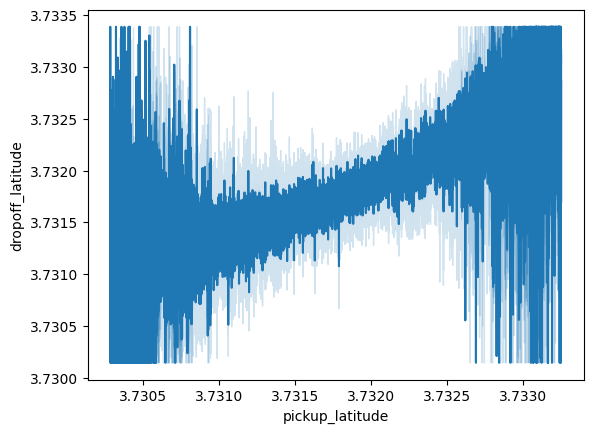

In [ ]:
sns.lineplot(x='pickup_latitude',y='dropoff_latitude',data=numerical)

<Axes: xlabel='pickup_longitude', ylabel='dropoff_longitude'>

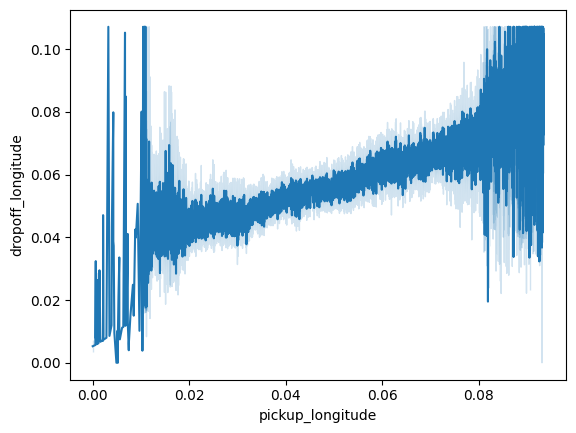

In [ ]:
sns.lineplot(x='pickup_longitude',y='dropoff_longitude',data=numerical)

We can see there is moderate correlation between pickup latitude and dropoff latitude as well as longitudes